In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [14]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_pmip3_ipsl_hist_null.csv', delimiter=",", dtype=float).flatten()

In [15]:
delphi_hist_wrap = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_wrap = ( delphi_hist_null + np.pi) % (2 * np.pi )

values_pi, bins_hist, _ = plt.hist(delphi_hist_wrap/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])

plt.legend()
plt.savefig('hist_hist_null.png', format='png', dpi=1000)

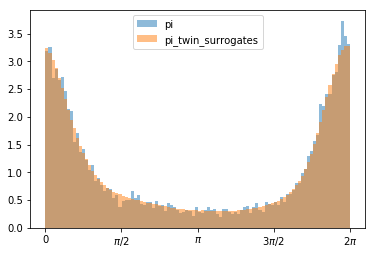

In [5]:
delphi_pi = np.genfromtxt('delphi_pi.csv', delimiter=",", dtype=float).flatten()
delphi_pi_null = np.genfromtxt('delphi_pmip3_ipsl_cmip5_picontrol_null.csv', delimiter=",", dtype=float).flatten()
delphi_pi_wrap = ( delphi_pi + np.pi) % (2 * np.pi ) 
delphi_pi_null_wrap = ( delphi_pi_null + np.pi) % (2 * np.pi )

values_pi, bins_hist, _ = plt.hist(delphi_pi_wrap/(2*np.pi), normed=True, bins=100, alpha=0.5, label='pi')
_, _, _ = plt.hist(delphi_pi_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='pi_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.legend()
plt.savefig('pi_pi_null.png', format='png', dpi=1000)

In [6]:
def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_nh, dvolc_sh, dvolc_tropical, 
                     delphi_hist_dist_2, delphi_hist_null_dist_2, delphi_pi_dist_2,
                     delphi_pi_null_dist_2):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    # set up figure
    fig = pl.figure(figsize=[12, 9.0])
    axlabfs, tiklabfs, splabfs = 4, 5, 7
    start_year = 851
    end_year = 1850

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.1, 0.53, 0.85, 0.4])
    ax1.plot(ct, -del_phi/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
    ax1.bar(left = te,
            width = 200 * np.ones(len(te)),
            height = (yhi - ylo) * np.ones(len(te)),
            bottom = ylo * np.ones(len(te)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1,)
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.1, 0.43, 0.85, 0.1])
    ax3 = fig.add_axes([0.1, 0.1, 0.425, 0.33])
    ax4 = fig.add_axes([0.525, 0.1, 0.425, 0.33])
    #ax3 = fig.add_axes([0.1, 0.66, 0.85, 0.15])
    ax2.plot(volc_time[:1000], dvolc_tropical[:1000],zorder=5, linewidth=0.5, color='red', label='Tropical')
    ax2.plot(volc_time[:1000], dvolc_nh[:1000], zorder=5, linewidth=0.5, color='blue', label='NH')
    ax2.plot(volc_time[:1000], dvolc_sh[:1000],  zorder=5, linewidth=0.5, color='green', label='SH')
    
    values_hist, bins_hist, _ = ax3.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist_tropical_eruptions', range=(-1,1))
    values_hist_null, bins_hist_null, _ = ax3.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))

    ax3.set_xlabel('Relative phase difference')
    ax3.set_ylabel('Probability Density')
    ax3.legend()
    ax3.set_xticks(np.arange(-1, 1.1, step=0.5))
    ax3.set_xticklabels(['-$\pi$','-$\pi$/2','0','$\pi$/2','$\pi$'])
    
    values_pi, bins_pi, _ = ax4.hist(delphi_pi_dist_2, normed=True, bins='fd', alpha=0.5, label='PI', range=(-1,1))
    values_pi_null, bins_pi_null, _ = ax4.hist(delphi_pi_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='PI_twin_surrogates', range=(-1,1))

    ax4.set_xlabel('Relative phase difference')
    ax4.set_ylabel('Probability Density')
    ax4.legend()
    ax4.set_xticks(np.arange(-1, 1.1, step=0.5))
    ax4.set_xticklabels(['-$\pi$','-$\pi$/2','0','$\pi$/2','$\pi$'])
    
    ax2.legend(loc='center left',  fontsize=splabfs)
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    ax1.set_ylim(ylo, 30)
    ax1.xaxis.tick_top()
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$")
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
    XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_xlabel("Time", fontsize=12)
    ax2.set_ylabel("VRF (W/$m^2$)", fontsize=axlabfs)

    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
    # save figure
    #figname = "../plots/02_delphi_timeseries.pdf"
#    figname = "../plots/02_delphi_timeseries_maxslope%s_chunksize%s.png" % (str(np.around(max_slope, decimals=2)), str(chunksize))
    #pl.savefig(figname, format='pdf', dpi=1000)
#    pl.savefig(figname, format='png', dpi=1000)
#    print("figure saved to: %s" % figname)
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time

# Read data and analyse
dvolc = np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist_dist_2 = np.genfromtxt('delphi_hist_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null_dist_2 = np.genfromtxt('delphi_hist_null_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_pi_dist_2 = np.genfromtxt('delphi_pi_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_pi_null_dist_2 = np.genfromtxt('delphi_pi_null_dist_2.csv', delimiter=",", dtype=float).flatten()

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
delphi_pi_dist_2 = delphi_pi_dist_2 / (2*np.pi)
delphi_pi_null_dist_2 = delphi_pi_null_dist_2 / (2*np.pi)


dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))

is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])

delphi_hist = np.genfromtxt('delphi_fit.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('is_plateau.csv', delimiter=",", dtype=float).flatten()
idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]
volc_time = yearly_time_axis(dvolc)
# 5 year window after volcanic eruption selected

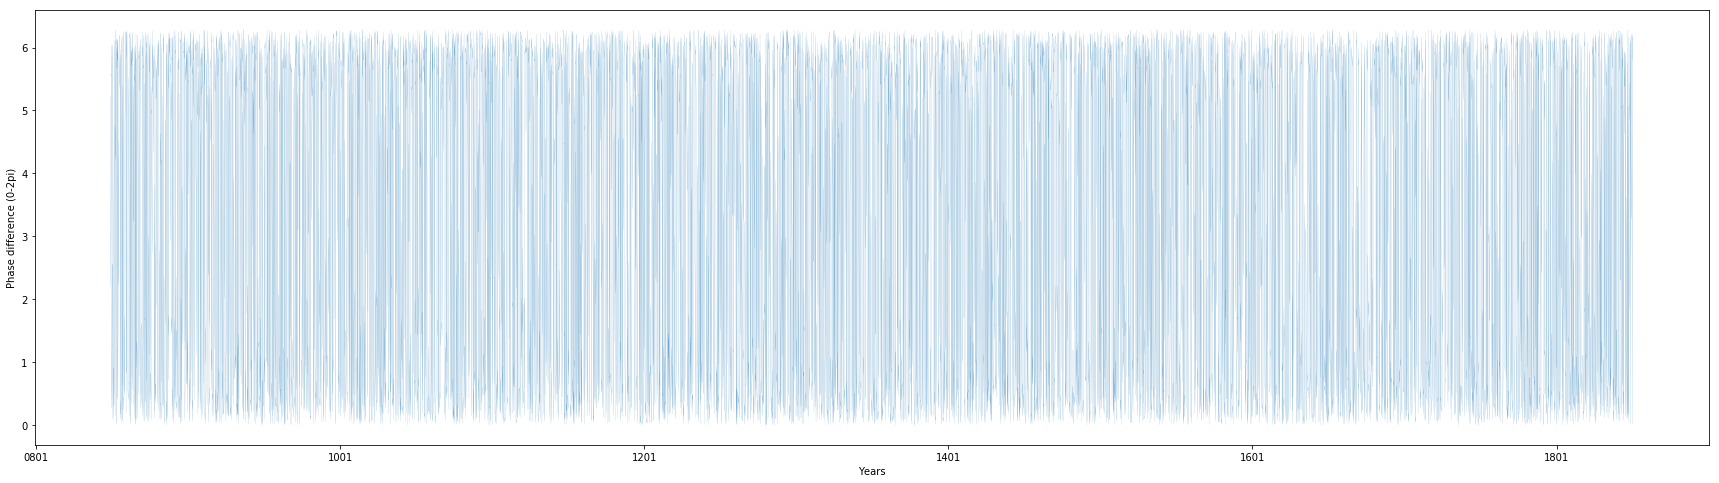

In [7]:
plt.figure(figsize=(30,8))
plt.xlabel('Years')
plt.ylabel('Phase difference (0-2pi)')
plt.plot(ct, delphi_hist_wrap, linewidth=0.1)
plt.savefig('phase_diff_0_2pi.png', format='png', dpi=1000)

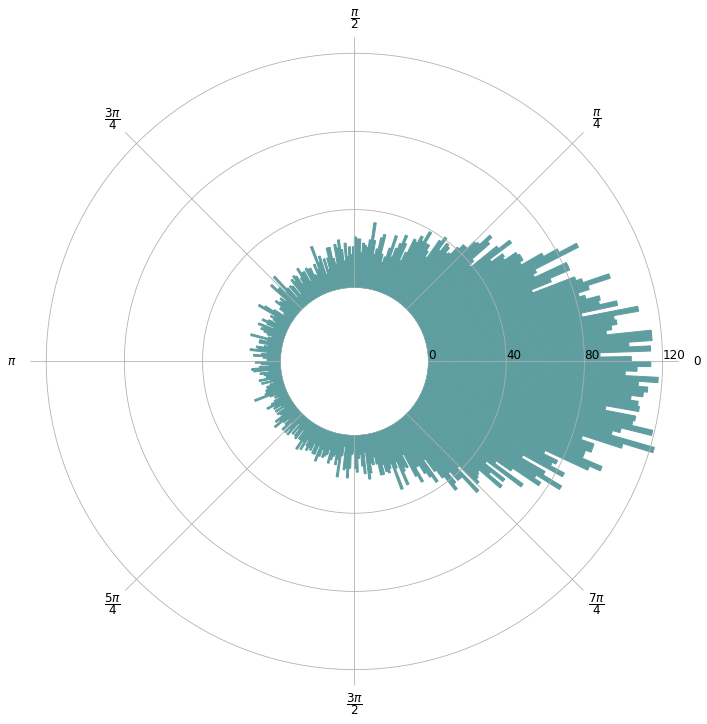

In [8]:
#! /usr/bin/env python
"""
Use a circular polar representation to plot phase differences
=============================================================


"""
# Created: Mon Mar 11, 2019  10:23am
# Last modified: Tue Mar 12, 2019  01:09am
# Copyright: Bedartha Goswami <goswami@pik-potsdam.de>


import sys
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator

from scipy.stats import truncnorm


def polar_plot(dist):
    # misc params
    pi = np.pi


    # get histogram
    hc, be = np.histogram(dist, bins=100)
    bc = 0.5 * (be[1:] + be[:-1])

    # set up figure
    fig = pl.figure(figsize=[32., 12.])
    l = 0.10
    b, w, h = 0.125, 0.75, 0.75
    ax = fig.add_axes([l, b, w, h], projection="polar")
    axlabfs, tiklabfs = 14, 12
    major_tiksz, minor_tiksz = 8, 4
    clr = "CadetBlue"

    ax.hist(delphi_hist_wrap, bins=360,
             edgecolor=clr, facecolor=clr)
    off = 0.10 * (hc.max() - hc.min())
    ax.set_rorigin(-off)
    ax.grid("on")
    xmajloc = MaxNLocator(nbins=4, integer=True, prune="upper")
    ax.yaxis.set_major_locator(xmajloc)
    ax.set_rlabel_position(0)
    ax.set_frame_on(False)
    ax.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{4}$",
                         r"$\dfrac{\pi}{2}$",
                         r"$\dfrac{3\pi}{4}$",
                         r"$\pi$",
                         r"$\dfrac{5\pi}{4}$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$\dfrac{7\pi}{4}$",
                         # r"$2\pi$",
                         ])

    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs, size=major_tiksz)
    #plt.savefig('polar_hist.png', format='png', dpi=1000)
polar_plot(delphi_hist_wrap)

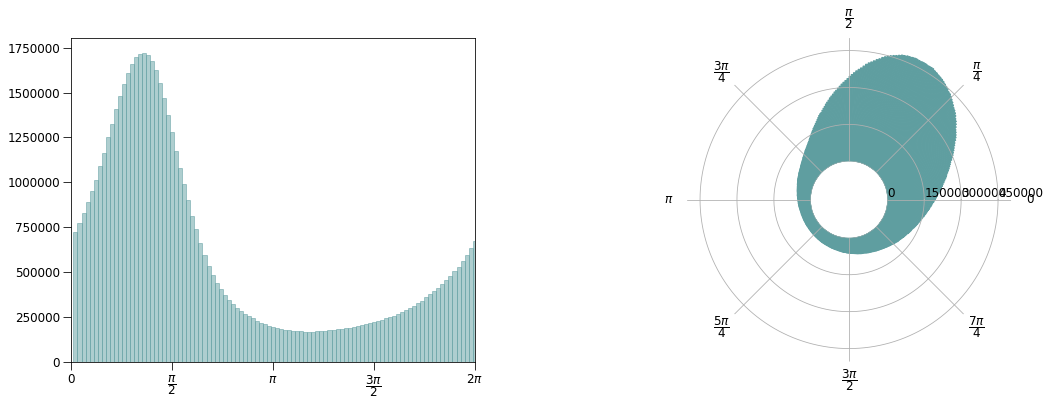

In [9]:
#! /usr/bin/env python
"""
Use a circular polar representation to plot phase differences
=============================================================


"""
# Created: Mon Mar 11, 2019  10:23am
# Last modified: Tue Mar 12, 2019  01:09am
# Copyright: Bedartha Goswami <goswami@pik-potsdam.de>


import sys
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator

from scipy.stats import truncnorm


if __name__ == "__main__":
    # misc params
    N = 50000
    pi = np.pi

    # generate phase differences between 0 and 2pi
    case = 2
    if case == 1:
        # case 1: two peaks at pi / 2 and 3pi / 2
        mu = [pi / 2., 3. * pi / 2.]
        sd = [pi / 8., pi / 4.]
    elif case == 2:
        # case 2: two peaks at 1 and 2pi (basically same peak), and one at pi
        mu = [0., pi, 2. * pi]
        sd = [pi / 4., pi / 8., pi / 4.]
    elif case == 3:
        # case 3: two peaks at 0 and 2pi i.e., it is basically one peak
        mu = [0., 2. * pi]
        sd = [ 1. * pi / 5., 1. * pi / 5.]

    # sample
    a, b = -2. * pi, 2. * pi
    phi = []
    M = N // len(mu)
    for i in range(len(mu)):
        sample = truncnorm.rvs(a=a, b=b, loc=mu[i], scale=sd[i], size=M)
        phi.extend(sample)

    # get histogram
    hc, be = np.histogram(delphi_hist_null_wrap, bins=100)
    bc = 0.5 * (be[1:] + be[:-1])

    # set up figure
    fig = pl.figure(figsize=[16., 6.])
    l_ = [0.10, 0.60]
    b, w, h = 0.125, 0.35, 0.75
    ax1 = fig.add_axes([l_[0], b, w, h])
    ax2 = fig.add_axes([l_[1], b, w, h], projection="polar")
    axlabfs, tiklabfs = 14, 12
    major_tiksz, minor_tiksz = 8, 4
    clr = "CadetBlue"

    # plot the normal histogram in the first axis
    # ax1.fill_between(bc, h, color="LightSkyBlue")
    ax1.bar(be[1:], hc, width=np.diff(be),
            edgecolor=clr, facecolor=clr,
            alpha=0.5)
    ax1.set_xticks(np.arange(0., 2. * pi + 0.001, pi / 2))
    ax1.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{2}$",
                         r"$\pi$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$2\pi$",
                         ])
    ax1.set_xlim(0., 2. * pi)

    # polar plot
    # ax2.bar(bc, hc, width=np.diff(be), bottom=0.)
    ax2.hist(delphi_hist_null_wrap, bins=360,
             edgecolor=clr, facecolor=clr)
    off = 0.10 * (hc.max() - hc.min())
    ax2.set_rorigin(-off)
    ax2.grid("on")
    xmajloc = MaxNLocator(nbins=4, integer=True, prune="upper")
    ax2.yaxis.set_major_locator(xmajloc)
    ax2.set_rlabel_position(0)
    ax2.set_frame_on(False)
    ax2.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{4}$",
                         r"$\dfrac{\pi}{2}$",
                         r"$\dfrac{3\pi}{4}$",
                         r"$\pi$",
                         r"$\dfrac{5\pi}{4}$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$\dfrac{7\pi}{4}$",
                         # r"$2\pi$",
                         ])

    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs, size=major_tiksz)
    plt.savefig('polar_hist_histnull.png', format='png', dpi=1000)
    # show / save
#FN = "output_plot_" + __file__[2:-3] + ".png"
#fig.savefig(FN)
#print("figure saved to: %s" % FN)

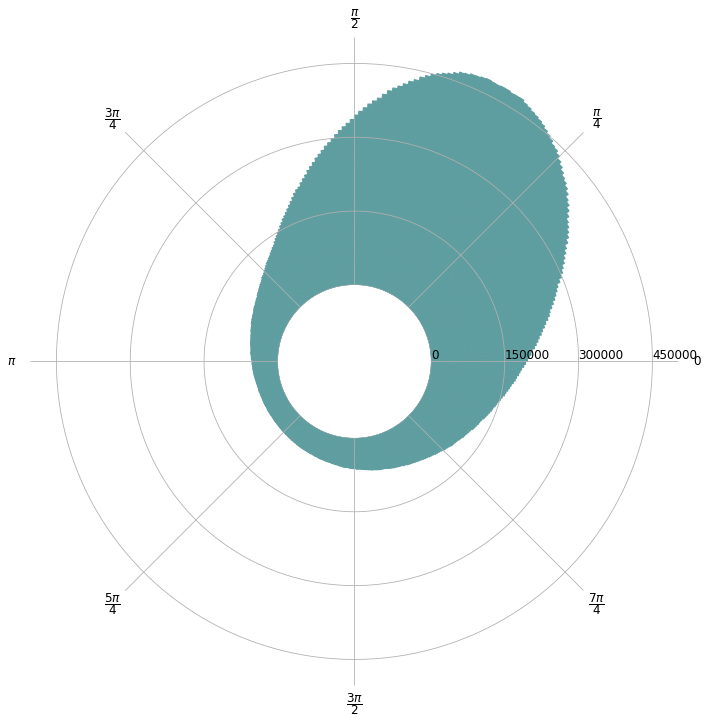

In [19]:
#! /usr/bin/env python
"""
Use a circular polar representation to plot phase differences
=============================================================


"""
# Created: Mon Mar 11, 2019  10:23am
# Last modified: Tue Mar 12, 2019  01:09am
# Copyright: Bedartha Goswami <goswami@pik-potsdam.de>


import sys
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator

from scipy.stats import truncnorm


def polar_plot(dist):
    # misc params
    N = 50000
    pi = np.pi

    # get histogram
    hc, be = np.histogram(dist, bins=100)
    bc = 0.5 * (be[1:] + be[:-1])

    # set up figure
    fig = pl.figure(figsize=[32, 12.])
    l = 0.10
    b, w, h = 0.125, 0.75, 0.75
    ax = fig.add_axes([l, b, w, h], projection="polar")
    axlabfs, tiklabfs = 14, 12
    major_tiksz, minor_tiksz = 8, 4
    clr = "CadetBlue"
    
    # polar plot
    # ax2.bar(bc, hc, width=np.diff(be), bottom=0.)
    ax.hist(dist, bins=360,
             edgecolor=clr, facecolor=clr)
    off = 0.10 * (hc.max() - hc.min())
    ax.set_rorigin(-off)
    ax.grid("on")
    xmajloc = MaxNLocator(nbins=4, integer=True, prune="upper")
    ax.yaxis.set_major_locator(xmajloc)
    ax.set_rlabel_position(0)
    ax.set_frame_on(False)
    ax.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{4}$",
                         r"$\dfrac{\pi}{2}$",
                         r"$\dfrac{3\pi}{4}$",
                         r"$\pi$",
                         r"$\dfrac{5\pi}{4}$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$\dfrac{7\pi}{4}$",
                         # r"$2\pi$",
                         ])

    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs, size=major_tiksz)
polar_plot(delphi_hist_null_wrap)
    #plt.savefig('polar_hist_histnull.png', format='png', dpi=1000)
    # show / save
#FN = "output_plot_" + __file__[2:-3] + ".png"
#fig.savefig(FN)
#print("figure saved to: %s" % FN)

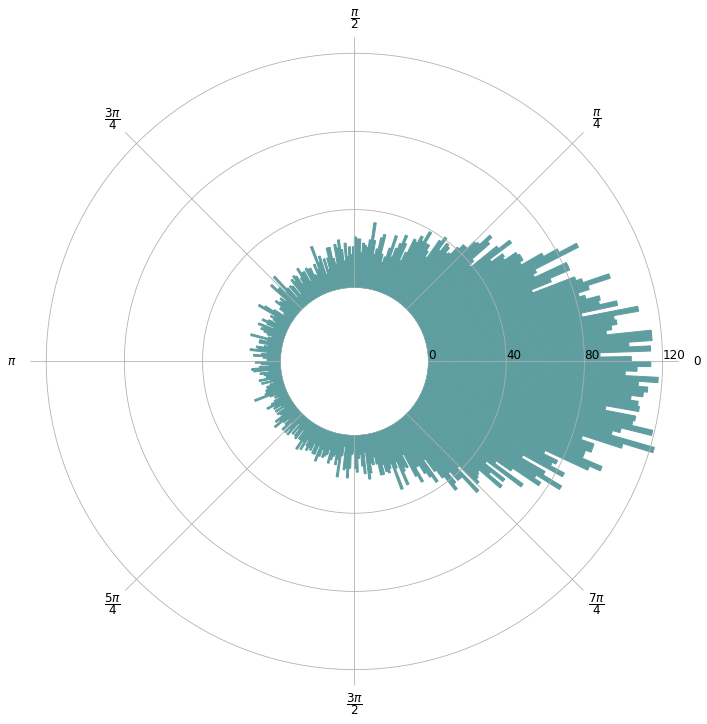

In [18]:
#! /usr/bin/env python
"""
Use a circular polar representation to plot phase differences
=============================================================


"""
# Created: Mon Mar 11, 2019  10:23am
# Last modified: Tue Mar 12, 2019  01:09am
# Copyright: Bedartha Goswami <goswami@pik-potsdam.de>


import sys
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator

from scipy.stats import truncnorm


def polar_plot(dist):
    # misc params
    pi = np.pi


    # get histogram
    hc, be = np.histogram(dist, bins=100)
    bc = 0.5 * (be[1:] + be[:-1])

    # set up figure
    fig = pl.figure(figsize=[32., 12.])
    l = 0.10
    b, w, h = 0.125, 0.75, 0.75
    ax = fig.add_axes([l, b, w, h], projection="polar")
    axlabfs, tiklabfs = 14, 12
    major_tiksz, minor_tiksz = 8, 4
    clr = "CadetBlue"

    ax.hist(dist, bins=360,
             edgecolor=clr, facecolor=clr)
    off = 0.10 * (hc.max() - hc.min())
    ax.set_rorigin(-off)
    ax.grid("on")
    xmajloc = MaxNLocator(nbins=4, integer=True, prune="upper")
    ax.yaxis.set_major_locator(xmajloc)
    ax.set_rlabel_position(0)
    ax.set_frame_on(False)
    ax.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{4}$",
                         r"$\dfrac{\pi}{2}$",
                         r"$\dfrac{3\pi}{4}$",
                         r"$\pi$",
                         r"$\dfrac{5\pi}{4}$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$\dfrac{7\pi}{4}$",
                         # r"$2\pi$",
                         ])

    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs, size=major_tiksz)
    #plt.savefig('polar_hist.png', format='png', dpi=1000)
polar_plot(delphi_hist_wrap)